In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Cubs players

cubs_data = master_data.loc[master_data["Franchise"] == "Cubs"]

#Only showing players that signed with the Cubs

signed_cubs_data = cubs_data.loc[cubs_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_cubs_data.groupby("Year")

#Unsigned Cubs draft picks

unsigned_cubs_data = cubs_data.loc[cubs_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
2001    58.8
2007    39.9
1985    37.0
1984    35.5
1970    34.5
2013    33.3
1991    29.6
1965    26.6
1986    23.7
1969    23.1
1995    21.3
1998    21.2
1997    20.9
2008    19.3
2000    18.9
1973    17.1
2009    17.0
1987    17.0
1981    16.8
2011    15.6
2003    13.7
2006    13.5
1966    12.7
1971    12.4
1975    12.4
1972    11.5
1996    10.5
2014     9.8
2002     9.6
1978     7.3
1980     6.5
2012     5.3
1982     5.2
2015     4.8
1983     3.6
1993     3.4
1994     2.6
2004     2.5
1968     2.3
1977     1.3
2010     0.6
2018     0.2
2019     0.0
1990     0.0
2005     0.0
2016     0.0
2017     0.0
1967    -0.2
1976    -0.5
1988    -0.9
1999    -1.3
1989    -1.5
1979    -1.8
1992    -2.8
1974    -3.5
Name: Total_WAR, dtype: float64

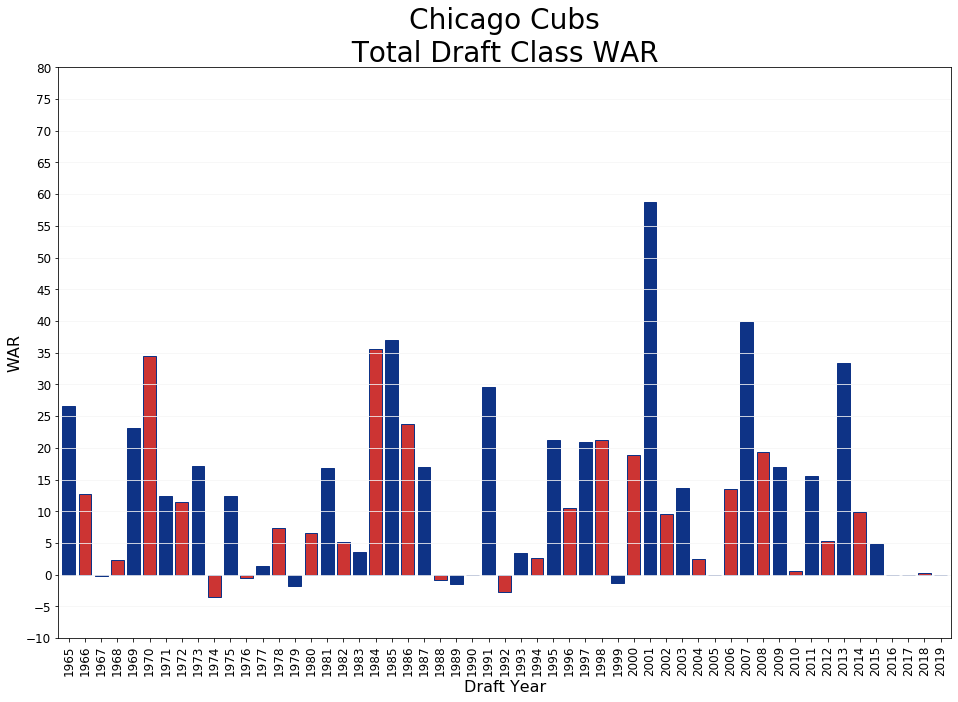

In [6]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#0E3386", "#CC3433"], width = .8, fontsize = 12, edgecolor = "#0E3386", figsize = (16, 10.5))
plt.title("Chicago Cubs\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 81, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Cubs WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_cubs_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
4650,1970,3,67,Cubs,Cubs,Y,Rick Reuschel,1972.0,reuscri01,1010852.0,0.5,35.5,36.0,RHP,4Yr,Western Illinois University,Macomb,IL,More than 25 WAR
48744,2007,1,48,Cubs,Cubs,Y,Josh Donaldson,2010.0,donaljo02,5038.0,30.1,0.0,30.1,C,4Yr,Auburn University,Auburn,AL,More than 25 WAR
15726,1984,2,31,Cubs,Cubs,Y,Greg Maddux,1986.0,maddugr01,104.0,1.0,27.2,28.2,RHP,HS,Valley HS,Las Vegas,NV,More than 25 WAR
57469,2013,1,2,Cubs,Cubs,Y,Kris Bryant,2015.0,bryankr01,15429.0,27.8,0.0,27.8,3B,4Yr,University of San Diego,San Diego,CA,More than 25 WAR
17156,1985,24,622,Cubs,Cubs,Y,Mark Grace,1988.0,gracema01,56.0,21.2,0.0,21.2,1B,4Yr,San Diego State University,San Diego,CA,20-25 WAR
30372,1995,1,4,Cubs,Cubs,Y,Kerry Wood,1998.0,woodke02,304.0,0.7,20.4,21.1,RHP,HS,Grand Prairie HS,Grand Prairie,TX,20-25 WAR
38519,2000,8,223,Cubs,Cubs,Y,Dontrelle Willis,2003.0,willido03,1703.0,3.9,16.1,20.0,LHP,HS,Encinal HS,Alameda,CA,20-25 WAR
60,1965,4,61,Cubs,Cubs,Y,Ken Holtzman,1965.0,holtzke01,1005989.0,-0.7,19.9,19.2,LHP,4Yr,University of Illinois at Urbana-Champaign,Champaign,IL,15-20 WAR
16556,1985,1,22,Cubs,Cubs,Y,Rafael Palmeiro,1986.0,palmera01,1266.0,18.9,0.0,18.9,OF,4Yr,Mississippi State University,Starkville,MS,15-20 WAR
39856,2001,4,108,Cubs,Cubs,Y,Ricky Nolasco,2006.0,nolasri01,3830.0,0.1,17.3,17.4,RHP,HS,Rialto HS,Rialto,CA,15-20 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_cubs_data.loc[((signed_cubs_data["WAR Group"] == "Less than 5 WAR") |
(signed_cubs_data["WAR Group"] == "No Major League Experience")) & 
(signed_cubs_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
5,1965,1,6,Cubs,Cubs,Y,Rick James,1967.0,jamesri01,1006353.0,0.0,-0.1,-0.1,RHP,HS,Coffee HS,Florence,AL,Less than 5 WAR
828,1966,1,5,Cubs,Cubs,Y,Dean Burk,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Highland HS,Highland,IL,No Major League Experience
1656,1967,1,2,Cubs,Cubs,Y,Terry Hughes,1970.0,hughete01,1006162.0,-0.1,0.0,-0.1,SS,HS,Paul M. Dorman HS,Roebuck,SC,Less than 5 WAR
2644,1968,1,15,Cubs,Cubs,Y,Ralph Rickey,NaN,NaN,NaN,NaN,NaN,NaN,OF,4Yr,University of Oklahoma,Norman,OK,No Major League Experience
3557,1969,1,16,Cubs,Cubs,Y,Roger Metzger,1970.0,metzgro01,1008812.0,3.7,0.0,3.7,SS,4Yr,St. Edward's University,Austin,TX,Less than 5 WAR
4602,1970,1,19,Cubs,Cubs,Y,Gene Hiser,1971.0,hiserge01,1005857.0,-1.5,0.0,-1.5,OF,4Yr,University of Maryland,College Park,MD,Less than 5 WAR
5526,1971,1,16,Cubs,Cubs,Y,Jeff Wehmeier,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Brebeuf Jesuit Preparatory HS,Indianapolis,IN,No Major League Experience
6326,1972,1,15,Cubs,Cubs,Y,Brian Vernoy,NaN,NaN,NaN,NaN,NaN,NaN,LHP,HS,La Quinta HS,Westminster,CA,No Major League Experience
7118,1973,1,16,Cubs,Cubs,Y,Jerry Tabb,1976.0,tabbje01,1012803.0,-0.5,0.0,-0.5,1B,4Yr,University of Tulsa,Tulsa,OK,Less than 5 WAR
7856,1974,1,7,Cubs,Cubs,Y,Scot Thompson,1978.0,thompsc01,1013025.0,-3.4,0.0,-3.4,OF,HS,Knoch HS,Saxonburg,PA,Less than 5 WAR


In [9]:
#Best unsigned draft picks in franchise history

unsigned_cubs_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
11081,1978,15,377,Cubs,Cubs,N,Mark Langston,1984.0,langsma01,1007323.0,0.0,27.5,27.5,LHP,HS,Buchser HS,Santa Clara,CA,More than 25 WAR
44123,2003,48,1408,Cubs,Cubs,N,Tim Lincecum,2007.0,linceti01,5705.0,-0.5,27.9,27.4,RHP,HS,Liberty HS,Renton,WA,More than 25 WAR
19195,1987,37,938,Cubs,Cubs,N,Jeff Cirillo,1994.0,cirilje01,1073.0,25.8,0.0,25.8,RHP,HS,Providence HS,North Hollywood,CA,More than 25 WAR
264,1965,13,265,Cubs,Cubs,N,Darrell Evans,1969.0,evansda01,1003864.0,25.1,0.0,25.1,3B,HS,Muir HS,Altadena,CA,More than 25 WAR
16768,1985,9,234,Cubs,Cubs,N,Kevin Tapani,1989.0,tapanke01,1012824.0,0.0,23.1,23.1,RHP,4Yr,Central Michigan University,Mount Pleasant,MI,20-25 WAR
24171,1991,9,241,Cubs,Cubs,N,Jon Lieber,1994.0,liebejo01,287.0,0.2,18.9,19.1,RHP,4Yr,University of South Alabama,Mobile,AL,15-20 WAR
50971,2008,27,821,Cubs,Cubs,N,Sonny Gray,2013.0,grayso01,12768.0,0.0,18.4,18.4,RHP,HS,Smyrna HS,Smyrna,TN,15-20 WAR
8166,1974,14,319,Cubs,Cubs,N,Bob Welch,1978.0,welchbo01,1013750.0,-0.9,17.9,17.0,RHP,HS,Hazel Park HS,Hazel Park,MI,15-20 WAR
30459,1995,4,91,Cubs,Cubs,N,Adam Everett,2001.0,everead01,1430.0,9.2,0.0,9.2,SS,HS,Harrison HS,Kennesaw,GA,5-10 WAR
15441,1983,23,573,Cubs,Cubs,N,Jeff King,1989.0,kingje01,1006931.0,8.2,0.0,8.2,SS,HS,Rampart HS,Colorado Springs,CO,5-10 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_cubs_data.loc[signed_cubs_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
17156,1985,24,622,Cubs,Cubs,Y,Mark Grace,1988.0,gracema01,56.0,21.2,0.0,21.2,1B,4Yr,San Diego State University,San Diego,CA,20-25 WAR
3819,1969,12,280,Cubs,Cubs,Y,Bill North,1971.0,northbi01,1009638.0,16.1,0.0,16.1,OF,4Yr,Central Washington University,Ellensburg,WA,15-20 WAR
17948,1986,23,582,Cubs,Cubs,Y,Rick Wilkins,1991.0,wilkiri01,1013960.0,14.4,0.0,14.4,C,JC,Florida College,Jacksonville,FL,10-15 WAR
40066,2001,11,318,Cubs,Cubs,Y,Geovany Soto,2005.0,sotoge01,3707.0,12.5,0.0,12.5,C,HS,American Military Academy,Guaynabo,PR,10-15 WAR
32894,1996,29,862,Cubs,Cubs,Y,Kyle Lohse,2001.0,lohseky01,739.0,0.1,11.4,11.5,RHP,HS,Hamilton City HS,Glenn,CA,10-15 WAR
6710,1972,17,399,Cubs,Cubs,Y,Ray Burris,1973.0,burrira01,1001729.0,-0.5,10.9,10.4,RHP,4Yr,Southwestern Oklahoma State University,Weatherford,OK,10-15 WAR
35873,1998,17,496,Cubs,Cubs,Y,Eric Hinske,2002.0,hinsker01,1305.0,10.3,0.0,10.3,3B,4Yr,University of Arkansas,Fayetteville,AR,10-15 WAR
1417,1966,31,595,Cubs,Cubs,Y,Bill Stoneman,1967.0,stonebi01,1012560.0,-1.9,10.6,8.7,RHP,4Yr,University of Idaho,Moscow,ID,5-10 WAR
42376,2002,38,1143,Cubs,Cubs,Y,Randy Wells,2008.0,wellsra01,4535.0,0.2,5.2,5.4,C,JC,Southwestern Illinois College,Belleville,IL,5-10 WAR
34104,1997,11,334,Cubs,Cubs,Y,Michael Wuertz,2004.0,wuertmi01,1856.0,-0.1,4.7,4.6,RHP,HS,Austin HS,Austin,MN,Less than 5 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(cubs_data["Year"], cubs_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1965,43.3,50.0,6.7
1966,44.7,47.4,7.9
1967,23.3,73.3,3.3
1968,36.7,53.3,10.0
1969,39.5,55.3,5.3
1970,29.8,63.8,6.4
1971,12.0,84.0,4.0
1972,48.1,51.9,0.0
1973,35.5,58.1,6.5


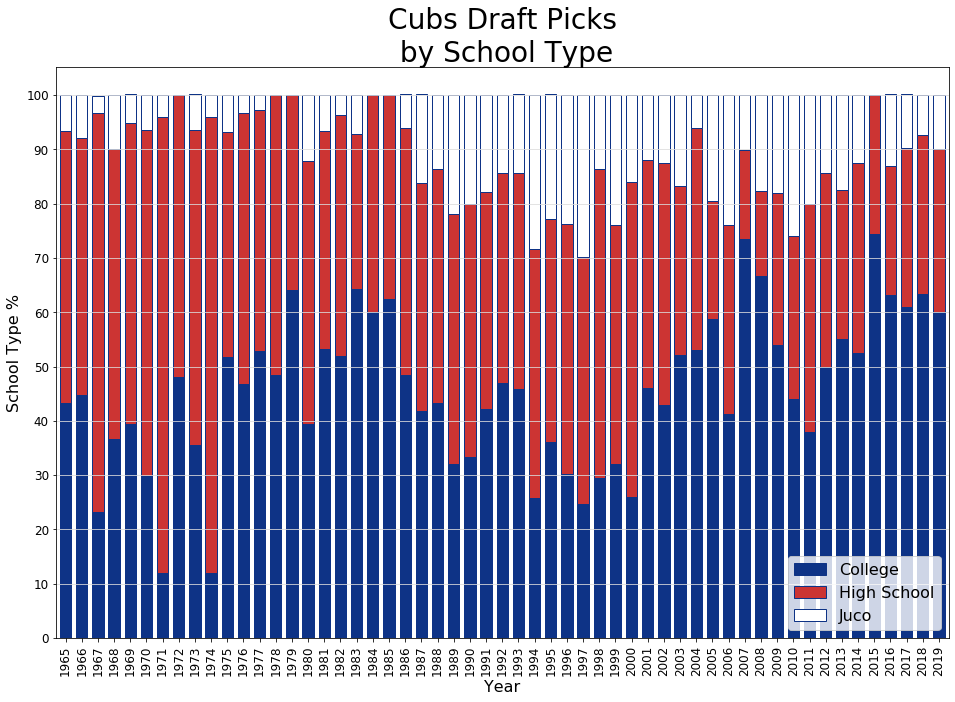

In [14]:
#Bar chart of table above

colors = ["#0E3386", "#CC3433", "white"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#0E3386", stacked = True, figsize = (16, 10.5))
plt.title("Cubs Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "gainsboro", linestyle = "-", axis = "y")
plt.savefig("Cubs Draft Picks by School Type.png")
plt.show()